In [ ]:
## Question 1: EDA – Sentiment Analysis from Drug Reviews (Easy)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\420317\Downloads\ICT-AI-ASSIGNMENT-main\Ast_code\drugLibTest_raw.tsv", sep='\t')

In [3]:
data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [4]:
data.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1036 non-null   int64 
 1   urlDrugName        1036 non-null   object
 2   rating             1036 non-null   int64 
 3   effectiveness      1036 non-null   object
 4   sideEffects        1036 non-null   object
 5   condition          1036 non-null   object
 6   benefitsReview     1031 non-null   object
 7   sideEffectsReview  1013 non-null   object
 8   commentsReview     1035 non-null   object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB


### data will understanding,cleaning and EDA

In [6]:
data.dtypes

Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object

In [7]:
data.describe()

,Unnamed: 0,rating
count,1036.000000,1036.000000
mean,2085.413127,6.767375
std,1243.695218,2.976711
min,1.000000,1.000000
25%,968.250000,5.000000
50%,2048.000000,8.000000
75%,3199.750000,9.000000
max,4157.000000,10.000000


In [8]:
print(data.isnull().sum())
#  benefitsReview 5,sideEffectsReview 23 ,commentsReview 1 null values there

''' if this null values not need to remove '''

print(data.isnull().sum())

Unnamed: 0            0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             0
benefitsReview        5
sideEffectsReview    23
commentsReview        1
dtype: int64
Unnamed: 0            0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             0
benefitsReview        5
sideEffectsReview    23
commentsReview        1
dtype: int64


#### finding values in sentimental analysis corresponding rating colums
##### If create conditions for snetimnetal analysis , rating values will arrange in to particular values

In [10]:
''' rating >= 7 positive, <= 4 negative, 5-6 neutral '''
""" create conditions for rating columns """

print(data['rating'].unique())

[ 9  4 10  2  8  1  3  6  5  7]


#### finding values in sentimental analyss in using rating values

In [ ]:
# create sentimental columns in corresponding data
''' rating >= 6 positive, <= 4 negative, 5 neutral '''

sentiments = []
for data_rate in data['rating']:
    if data_rate >= 7:
        sentiments.append('positive')
    elif data_rate <= 4:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')
data['sentiment'] = sentiments

In [12]:
print(data['sentiment'].value_counts())

sentiment
positive    670
negative    241
neutral     125
Name: count, dtype: int64


#### Visualize Frequency of Most Common Drug

In [13]:
data.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'sentiment'],
      dtype='object')

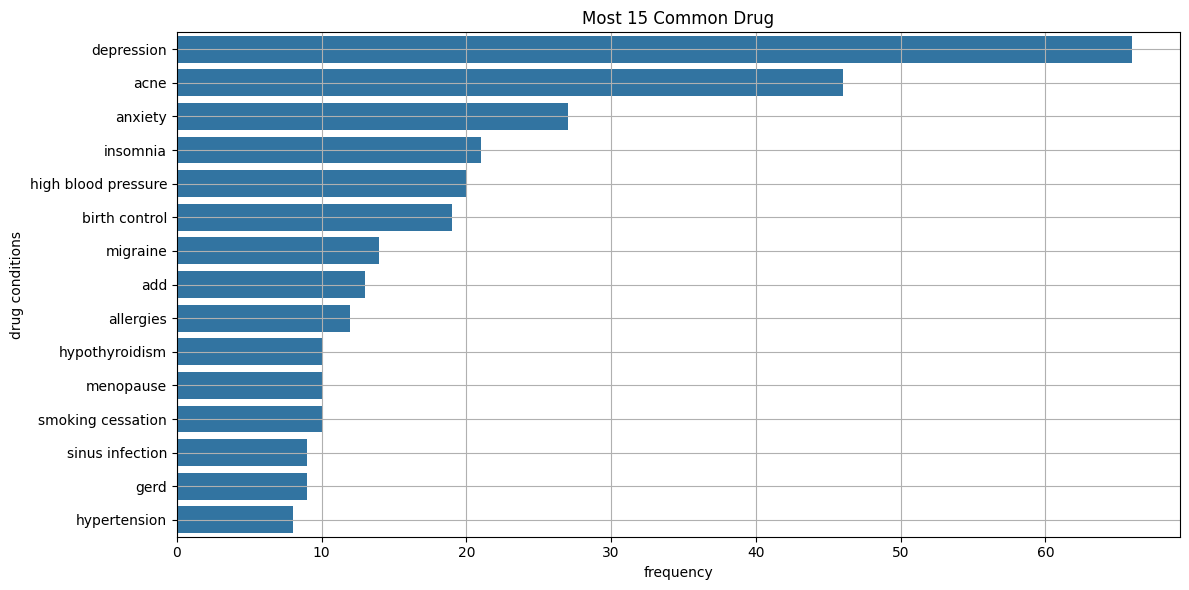

In [14]:
top_5_values = data['condition'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=top_5_values.index, x=top_5_values.values)
plt.title('Most 15 Common Drug')
plt.xlabel('frequency')
plt.ylabel('drug conditions')
plt.tight_layout()
plt.grid()
plt.show()


#### Average Rating plot

In [15]:
data.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'sentiment'],
      dtype='object')

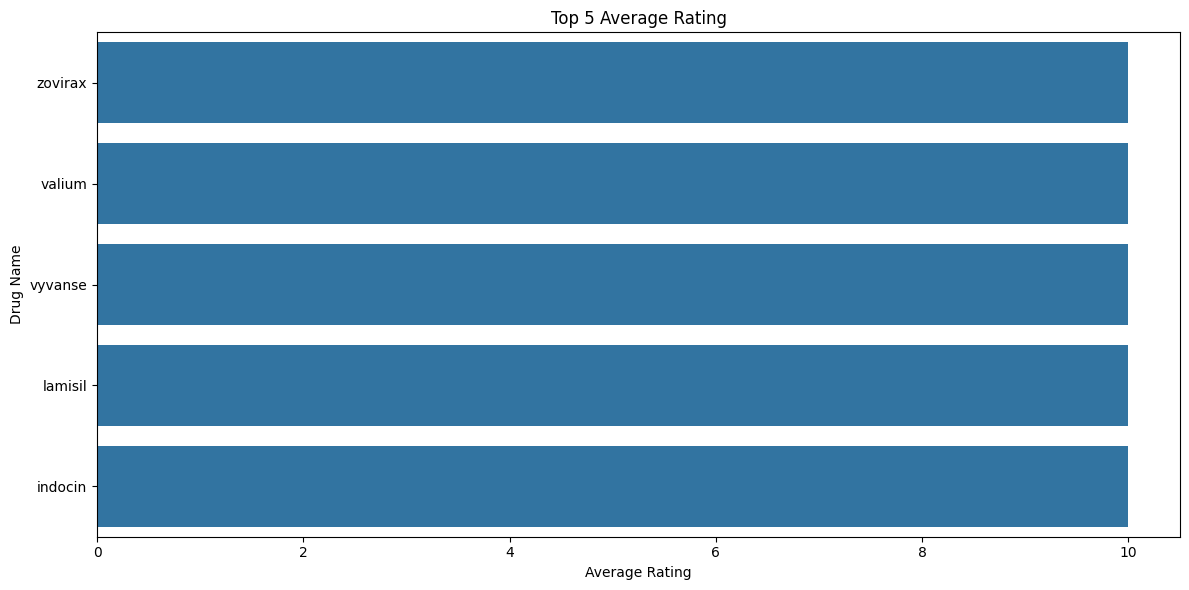

In [16]:
avg_rating = data.groupby('urlDrugName')['rating'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating.values, y=avg_rating.index)
plt.title('Top 5 Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()

#### Clean and tokenize text, and visualize word clouds for positive and negative reviews.

In [ ]:
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [19]:
data.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'sentiment'],
      dtype='object')

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

In [20]:
data['review'] = data['commentsReview'].apply(clean_text)

In [21]:
data['review']

0       took antibiotics days sinus infection gone th day
1       severe mood swings hypomania depression suicid...
2       depakote prescribed kaiser psychiatrist pleasa...
3       drug may everyone wonderful makes totally diff...
4       drug taken gelatin tablet mg per day drug trea...
                              ...                        
1031    treatment period months weeks dosage tablets m...
1032    use albuterol needed allergies seasonal dust e...
1033    drug highly teratogenic females must take cont...
1034    divigel topically applied bioidentical hormone...
1035                                   stopped using time
Name: review, Length: 1036, dtype: object

In [27]:
positive_text = ' '.join(data[data['sentiment'] == 'positive']['review'])
print(positive_text)
print("--"*10)
negative_text = ' '.join(data[data['sentiment'] == 'negative']['review'])
print(negative_text)

took antibiotics days sinus infection gone th day severe mood swings hypomania depression suicide ideation lamictal began mg tritrated mg months played around dosage finally arrive mg experimented taking different times evening found comfortable time sleep drug may everyone wonderful makes totally different person better person drug taken gelatin tablet mg per day drug treatment carried bimonthly visits physician weeks ended treatment successfully finished treatment recurrence acne took seizure took pills drank water drank water took pills took pills drank water drank water took pills took pills drank water drank water took pills toook pills drank water drank water toook pills took pills drank water drank water took pills treating neck shoulder arms lower back hip thigh knee pain started klonopin prozac together first took klonopin times day gradually able cut back twice day first thing morning dinnertime gradually cutting first noontime dosage bedtime one never talktherapy continue ta

In [31]:
words_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
words_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

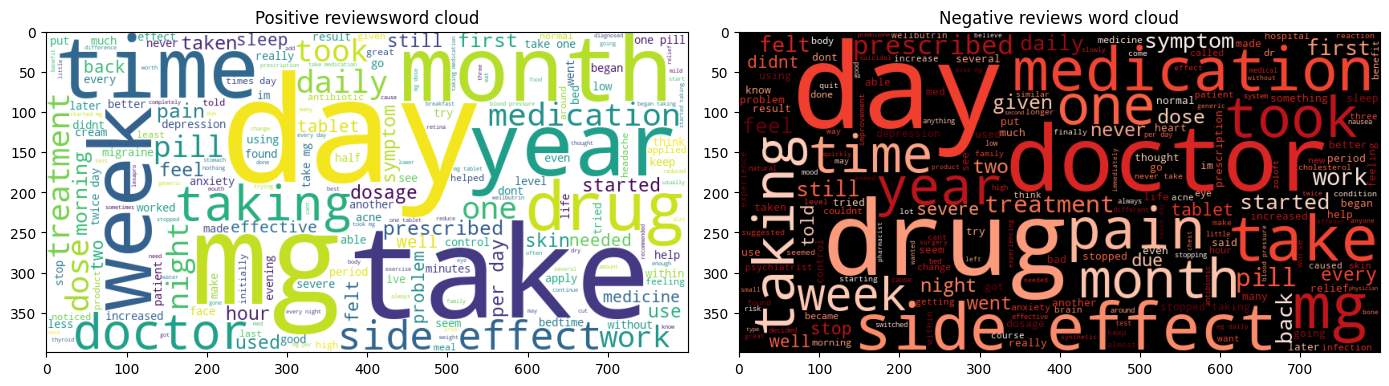

In [34]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(words_positive)

plt.title("Positive reviewsword cloud")

plt.subplot(1,2,2)
plt.imshow(words_negative)

plt.title("Negative reviews word cloud")

plt.tight_layout()
plt.show()